In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

import warnings

In [46]:
df = pd.read_csv('data/stud.csv')

In [47]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [48]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [49]:
X = df.drop('math_score', axis=1) # we will predict math score
y = df['math_score']

In [50]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()


# Create Column Transformer with 3 types of transformers
preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',cat_transformer,cat_features),
        ('StandardScaler',num_transformer,num_features),
    ]
)

In [51]:
X = preprocessor.fit_transform(X)

In [56]:
X.shape

(1000, 19)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.05694554,  0.45733301],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.94779033,  0.98406266],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.35894946,  1.18158627],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.49126664, -0.99117351],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -1.45063795, -0.99117351],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.4960025 ,  1.37910989]])

In [54]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [38]:
models ={
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "SVR": SVR(),
    "LinearModel": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "xgboost": XGBRegressor()
}

model_list =[]
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    model_list.append(list(models.keys())[i])
  
    print('Model:',list(models.keys())[i])
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Model: KNN
Model performance for Training set
- Root Mean Squared Error: 5.7172
- Mean Absolute Error: 4.5270
- R2 Score: 0.8550
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.2553
- Mean Absolute Error: 5.6280
- R2 Score: 0.7837


Model: Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.2444
- Mean Absolute Error: 6.5100
- R2 Score: 0.7207


Model: Random Forest
Model performance for Training set
- Root Mean Squared Error: 2.2835
- Mean Absolute Error: 1.8221
- R2 Score: 0.9769
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0119
- Mean Absolute Error: 4.6409
- R2 Score: 0.8515


Model: AdaBoostRegressor
Model performance for Training set
- Root Mean Squared Error: 5.7815
- Mean Absolute Error: 4.7043
- R2 Score: 0.85

In [39]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,Ridge,0.880593
5,LinearModel,0.880082
2,Random Forest,0.851470
3,AdaBoostRegressor,0.846653
8,xgboost,0.827797
7,Lasso,0.825320
0,KNN,0.783681
4,SVR,0.728600
1,Decision Tree,0.720677


## LINEAR REGRESSION 

In [41]:
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)
print("R2 Score: ",score)

R2 Score:  0.8800816436419534


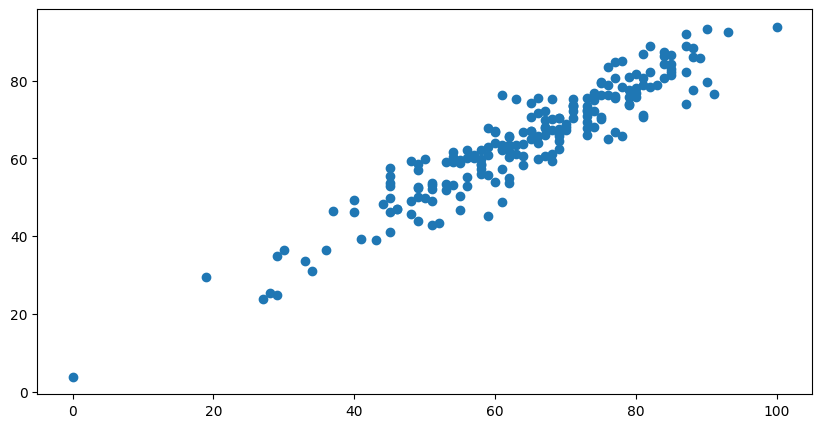

In [42]:
## scatter plot between actual and predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred)